**PASO 1: IMPORTAR LOS MÓDULOS NECESARIOS**

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
%matplotlib inline

**PASO 2: OBTENER EL HTML**

In [2]:

from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://www.hubertiming.com/results/2017GPTR10K"
response = requests.get(url)
html = response.text

**PASO 3: ANALIZAR EL HTML**

In [3]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [4]:
# OBTENGO EL TÍTULO
tittle= soup.title
print(tittle)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [5]:
# ENCUENTRO TODAS LAS ETIQUETAS DE ANCLAJE <a> (HIPERVÍNCULOS) EN LA PÁGINA WEB
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img

In [6]:
# ENCUENTRO TODAS LAS ETIQUETAS <table> (TABLAS) EN LA PÁGINA WEB
soup.find_all('table')

[<table class="pull-right text-xs-right" style="float:right">
 <tbody>
 <tr colspan="2">
 <b>10K:</b>
 </tr>
 <tr>
 <td>Finishers:</td>
 <td>577</td>
 </tr>
 <tr>
 <td>Male:</td>
 <td>414</td>
 </tr>
 <tr>
 <td>Female:</td>
 <td>163</td>
 </tr>
 </tbody>
 </table>,
 <table class="table table-striped table-hover ht-table table-responsive-md table-bordered" id="individualResults">
 <thead>
 <tr class="header">
 <th>Place</th>
 <th>Bib</th>
 <th>Name</th>
 <th>Gender</th>
 <th>City</th>
 <th>State</th>
 <th>Time</th>
 <th>Gun Time</th>
 <th>Team</th>
 </tr>
 </thead>
 <tbody>
 <tr class="" data-bib="814">
 <td>1</td>
 <td>814</td>
 <td>
 
                     JARED WILSON
 
                 </td>
 <td>M</td>
 <td>TIGARD</td>
 <td>OR</td>
 <td>36:21</td>
 <td>36:24</td>
 <td></td>
 </tr>
 <tr class="" data-bib="573">
 <td>2</td>
 <td>573</td>
 <td>
 
                     NATHAN A SUSTERSIC
 
                 </td>
 <td>M</td>
 <td>PORTLAND</td>
 <td>OR</td>
 <td>36:42</td>
 <td>36:45</td>


In [7]:
# ENCUENTRO TODAS LAS ETIQUETAS <tr> (FILAS DE TABLA) EN LA PÁGINA WEB
soup.find_all('tr')

[<tr colspan="2">
 <b>10K:</b>
 </tr>,
 <tr>
 <td>Finishers:</td>
 <td>577</td>
 </tr>,
 <tr>
 <td>Male:</td>
 <td>414</td>
 </tr>,
 <tr>
 <td>Female:</td>
 <td>163</td>
 </tr>,
 <tr class="header">
 <th>Place</th>
 <th>Bib</th>
 <th>Name</th>
 <th>Gender</th>
 <th>City</th>
 <th>State</th>
 <th>Time</th>
 <th>Gun Time</th>
 <th>Team</th>
 </tr>,
 <tr class="" data-bib="814">
 <td>1</td>
 <td>814</td>
 <td>
 
                     JARED WILSON
 
                 </td>
 <td>M</td>
 <td>TIGARD</td>
 <td>OR</td>
 <td>36:21</td>
 <td>36:24</td>
 <td></td>
 </tr>,
 <tr class="" data-bib="573">
 <td>2</td>
 <td>573</td>
 <td>
 
                     NATHAN A SUSTERSIC
 
                 </td>
 <td>M</td>
 <td>PORTLAND</td>
 <td>OR</td>
 <td>36:42</td>
 <td>36:45</td>
 <td>
 <img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                             INTEL TEAM F
                         </td>
 </tr>,
 <tr class="" data-bi

In [8]:
# ENCUENTRO TODAS LAS ETIQUETAS <th> (ENCABEZADOS DE TABLA) EN LA PÁGINA WEB
soup.find_all('th')

[<th>Place</th>,
 <th>Bib</th>,
 <th>Name</th>,
 <th>Gender</th>,
 <th>City</th>,
 <th>State</th>,
 <th>Time</th>,
 <th>Gun Time</th>,
 <th>Team</th>]

In [9]:
# ENCUENTRO TODAS LAS ETIQUETAS <td> (CELDAS DE TABLA) EN LA PÁGINA WEB
soup.find_all('td')

[<td>Finishers:</td>,
 <td>577</td>,
 <td>Male:</td>,
 <td>414</td>,
 <td>Female:</td>,
 <td>163</td>,
 <td>1</td>,
 <td>814</td>,
 <td>
 
                     JARED WILSON
 
                 </td>,
 <td>M</td>,
 <td>TIGARD</td>,
 <td>OR</td>,
 <td>36:21</td>,
 <td>36:24</td>,
 <td></td>,
 <td>2</td>,
 <td>573</td>,
 <td>
 
                     NATHAN A SUSTERSIC
 
                 </td>,
 <td>M</td>,
 <td>PORTLAND</td>,
 <td>OR</td>,
 <td>36:42</td>,
 <td>36:45</td>,
 <td>
 <img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                             INTEL TEAM F
                         </td>,
 <td>3</td>,
 <td>687</td>,
 <td>
 
                     FRANCISCO MAYA
 
                 </td>,
 <td>M</td>,
 <td>PORTLAND</td>,
 <td>OR</td>,
 <td>37:44</td>,
 <td>37:48</td>,
 <td></td>,
 <td>4</td>,
 <td>623</td>,
 <td>
 
                     PAUL MORROW
 
                 </td>,
 <td>M</td>,
 <td>BEAVERTON</td>,
 <td>

In [10]:
# ENCUENTRO TODAS LAS ETIQUETAS <li> (List Item) EN LA PÁGINA WEB
soup.find_all('li')

[<li><a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a></li>]

In [11]:
# ENCUENTRO TODAS LAS ETIQUETAS <div> (DIVISIÓN) EN LA PÁGINA WEB
soup.find_all('div')

[<div id="fb-root"></div>,
 <div class="container-fluid">
 <div class="row">
 <!-- column of race logo -->
 <div class="col-12 col-md-6 d-print-none">
 <img alt="2017 Intel Great Place to Run \ Urban Clash Games Logo" class="img-responsive mx-auto d-block" src="https://www.hubertiming.com/results/2017GPTRForResults.jpg" style="padding-top: 10px; max-width: 100%; height: auto; padding-bottom: 10px;"/>
 </div>
 <!-- column of race details -->
 <div class="col-9 col-md-5">
 <div class="row" style="padding-top: 10px">
 <p style="text-align: left">
 <big>
 <span aria-hidden="true" class="fas fa-flag"></span> 2017 Intel Great Place to Run 10K \ Urban Clash Games<br/>
 <span aria-hidden="true" class="fas fa-map-marker-alt"></span> Hillsboro Stadium, Hillsboro, OR <br/>
 <span aria-hidden="true" class="far fa-calendar-alt"></span> June 2nd, 2017
 
 
                             <br/>
 </big>
 </p>
 </div>
 <div class="row d-print-none" style="margin-top: 5%">
 <p class="text-left">
 <span clas

In [12]:
# ENCUENTRO TODAS LAS ETIQUETAS <i> (ÍCONOS) EN LA PÁGINA WEB
soup.find_all('i')

[<i aria-hidden="true" class="fa fa-user"></i>,
 <i aria-hidden="true" class="fa fa-users"></i>,
 <i aria-hidden="true" class="fa fa-user"></i>,
 <i aria-hidden="true" class="fa fa-users"></i>,
 <i class="fa fa-stream"></i>]

In [13]:
# ENCUENTRO TODAS LAS ETIQUETAS <img> (IMÁGENES) EN LA PÁGINA WEB
soup.find_all('img')

[<img alt="2017 Intel Great Place to Run \ Urban Clash Games Logo" class="img-responsive mx-auto d-block" src="https://www.hubertiming.com/results/2017GPTRForResults.jpg" style="padding-top: 10px; max-width: 100%; height: auto; padding-bottom: 10px;"/>,
 <img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>,
 <img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>,
 <img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=COLUMBIA%20TEAM%20B&amp;raceId=1251&amp;state="/>,
 <img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=COLUMBIA%20TEAM%20A&amp;raceId=1251&amp;state="/>,
 <img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=DTNA1&amp;raceId=1251&amp;state=OR"/>,
 <img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=DTNA2&amp;raceId=1251&amp;state=OR"/>,
 <img class="lazy teamThumbs

**PASO 4: LIMPIAR LOS DATOS**

In [14]:
table = soup.find("table")
table

<table class="pull-right text-xs-right" style="float:right">
<tbody>
<tr colspan="2">
<b>10K:</b>
</tr>
<tr>
<td>Finishers:</td>
<td>577</td>
</tr>
<tr>
<td>Male:</td>
<td>414</td>
</tr>
<tr>
<td>Female:</td>
<td>163</td>
</tr>
</tbody>
</table>

In [15]:
rows = table.find_all("tr")
rows

[<tr colspan="2">
 <b>10K:</b>
 </tr>,
 <tr>
 <td>Finishers:</td>
 <td>577</td>
 </tr>,
 <tr>
 <td>Male:</td>
 <td>414</td>
 </tr>,
 <tr>
 <td>Female:</td>
 <td>163</td>
 </tr>]

In [16]:
table = soup.find('table', {'id': 'individualResults'})
rows = table.find_all('tr')

list_rows = []
for row in rows:
    row_td = row.find_all('td')
    if not row_td:
      continue

    cleaned_row = []
    for cell in row_td:
        text = cell.get_text(strip=True).replace('$', '')
        if text:
          cleaned_row.append(text)
    if cleaned_row:
        list_rows.append(cleaned_row)

# OBTENGO LOS ENCABEZADOS DE LA TABLA
headers = [th.get_text(strip=True) for th in table.find_all('th')]

# CREO EL DATAFRAME
df = pd.DataFrame(list_rows, columns=headers)

print("DataFrame con datos limpios:")
df.head(10)

DataFrame con datos limpios:


,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
0,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,None
1,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F
2,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,None
3,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,None
4,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F
5,6,642,JONATHON TRAN,M,PORTLAND,OR,39:49,39:55,None
6,7,144,GEORGE TOTONCHY,M,PORTLAND,OR,40:04,40:17,None
7,8,395,BENJAMIN C CHAFFIN,M,PORTLAND,OR,40:05,40:09,None
8,9,7,BRANDON THOMAS,M,40:17,40:24,COLUMBIA TEAM B,None,None
9,10,3,ERIK BJORNSTAD,M,40:21,40:25,COLUMBIA TEAM A,None,None


**PASO 5: ALMACENAR LOS DATOS EN SQLITE**

In [17]:
# CREO UNA BASE DE DATOS VACÍA
conn = sqlite3.connect("race_results.db")
cursor = conn.cursor()

# CREO LA TABLA
df.columns

Index(['Place', 'Bib', 'Name', 'Gender', 'City', 'State', 'Time', 'Gun Time',
       'Team'],
      dtype='object')

In [18]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS results (
    Place INTEGER,
    Bib INTEGER,
    Name TEXT,
    Gender TEXT,
    City TEXT,
    State TEXT,
    Time TEXT,
    Gun Time TEXT,
    Team TEXT
)
""")

In [19]:
# INSERTO LOS VALORES
conn = sqlite3.connect("race_results.db")
cursor = conn.cursor()
df.to_sql("results", conn, if_exists="replace", index=False)

# GUARDO LOS CAMBIOS
conn.commit()
conn.close()
print("Base de datos creada")

Base de datos creada


In [20]:
# EJEMPLO
conn = sqlite3.connect("race_results.db")
cursor = conn.cursor()
cursor.execute("SELECT * FROM results LIMIT 5")
data = cursor.fetchall()
print("Datos de la base de datos:", data)
conn.close()

Datos de la base de datos: [('1', '814', 'JARED WILSON', 'M', 'TIGARD', 'OR', '36:21', '36:24', None), ('2', '573', 'NATHAN A SUSTERSIC', 'M', 'PORTLAND', 'OR', '36:42', '36:45', 'INTEL TEAM F'), ('3', '687', 'FRANCISCO MAYA', 'M', 'PORTLAND', 'OR', '37:44', '37:48', None), ('4', '623', 'PAUL MORROW', 'M', 'BEAVERTON', 'OR', '38:34', '38:37', None), ('5', '569', 'DEREK G OSBORNE', 'M', 'HILLSBORO', 'OR', '39:21', '39:24', 'INTEL TEAM F')]


**PASO 6: VISUALZACIÓN DE DATOS**

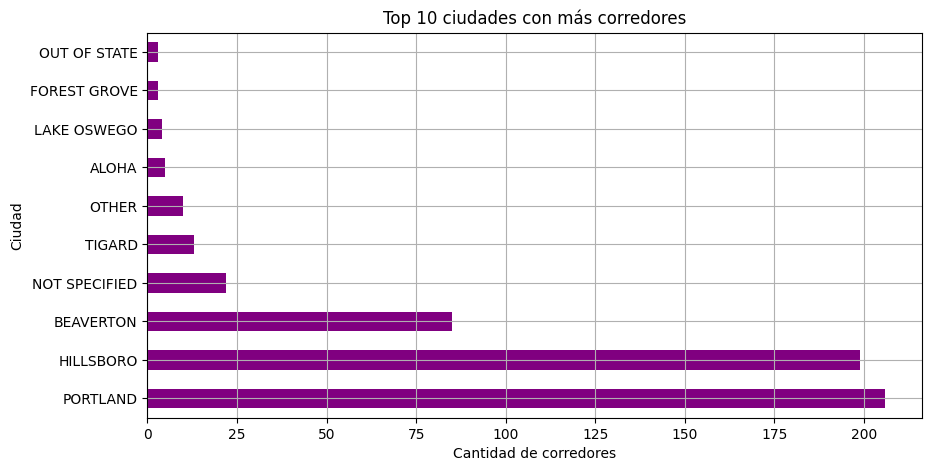

In [21]:
# DISTRIBUCIÓN POR CIUDADES
plt.figure(figsize = (10, 5))
df["City"].value_counts().head(10).plot(kind='barh', color='purple')
plt.xlabel("Cantidad de corredores")
plt.ylabel("Ciudad")
plt.title("Top 10 ciudades con más corredores")
plt.grid(True)
plt.show()

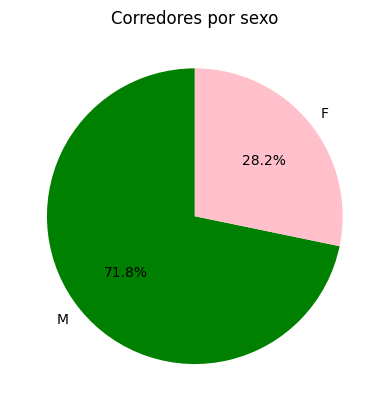

In [22]:
# CANTIDAD DE CORREDORES POR SEXO
gender_counts = df["Gender"].value_counts()
colores = 'green', 'pink'
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct="%1.1f%%",
    colors=colores,
    startangle=90
)
plt.title("Corredores por sexo")
plt.show()

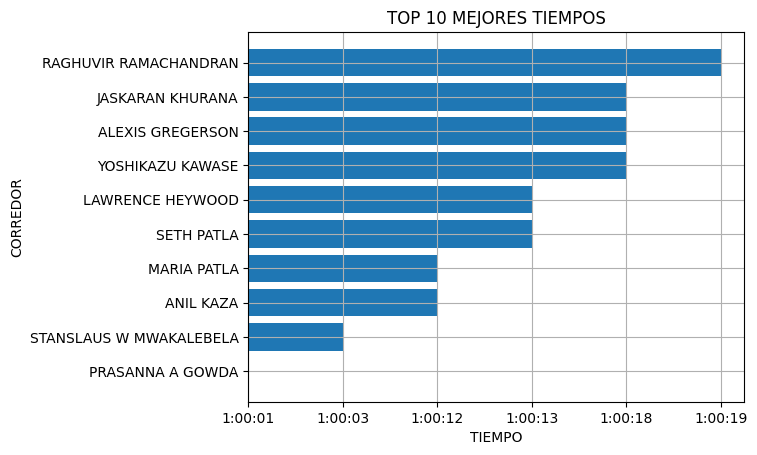

In [23]:
# TOP 10 MEJORES TIEMPOS
top10 = df.sort_values("Time").head(10)
plt.barh(top10["Name"], top10["Time"])
plt.title("TOP 10 MEJORES TIEMPOS")
plt.xlabel("TIEMPO")
plt.ylabel("CORREDOR")
plt.grid(True)
plt.show()